<a href="https://colab.research.google.com/github/clzndyal1/git_test/blob/master/19_Deep_Learning_Auto_Incoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.models import Sequential, load_model,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Embedding, LSTM, Activation

import tensorflow as tf
from keras.layers import Input, Dense

# from sklearn.model_selection import KFold
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical  #one-hot encoding과 같은 결과 반환
# from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.preprocessing import sequence

import numpy as np, array
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import sys

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
Reading package lists... Done
Building dependency tree       


In [3]:
import matplotlib.font_manager as fm

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
nanum_font

sys_font number: 48
nanum_font number: 31


['/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype

In [4]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# # 나눔고딕 폰트로 설정
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())

In [5]:
(x_train_2d, _), (_, _) = mnist.load_data()
x_train_2d = x_train_2d.astype(np.float32) / 255.0
x_train = x_train_2d.reshape(-1, np.prod(x_train_2d.shape[1:]))

x_train.shape


11490434/11490434 [==============================] - 0s 0us/step


(60000, 784)

In [10]:
input_dim = x_train.shape[1]
encoding_dim = 32

autoencoder1 = Sequential()
autoencoder1.add(Dense(encoding_dim, input_dim=input_dim, activation='relu'))
autoencoder1.add(Dense(input_dim, activation='sigmoid'))

autoencoder1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [11]:

autoencoder1.compile(optimizer="adam", loss="binary_crossentropy")

# autoencoder1.compile(loss="binary_crossentropy")

In [12]:
history = autoencoder1.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, verbose=0)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1616
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1042
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0964
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0950
Epoch 5/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0945
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0942
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0940
Epoch 8/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0939
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0938
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0937
Epoch 11/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0936
Epoch 12/100
1875/1875 [==============================] - 6s 3ms/step - l

1/1 [==============================] - 0s 253ms/step


<ipython-input-8-66bf36a39c53>:16: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
<ipython-input-8-66bf36a39c53>:16: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
<ipython-input-8-66bf36a39c53>:16: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-8-66bf36a39c53>:16: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
<ipython-input-8-66bf36a39c53>:16: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
<ipython-input-8-66bf36a39c53>:16: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

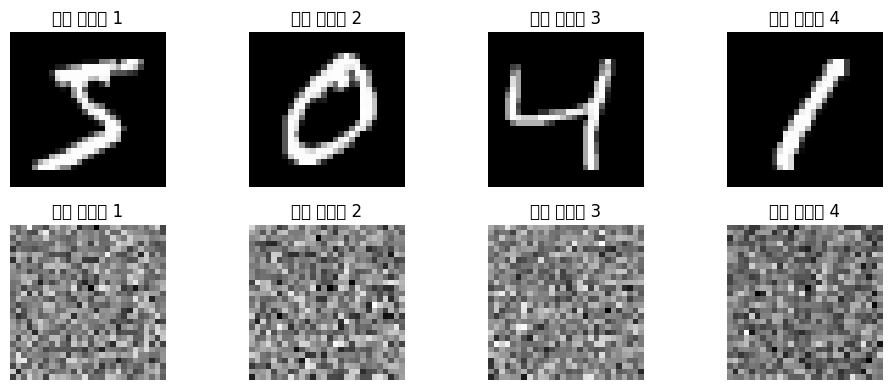

In [8]:
n = 4
x_train_recoverd = autoencoder1.predict(np.array(x_train[:n, :]))
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")


plt.tight_layout()
plt.show()

In [28]:
encoding_dim1 = 128
encoding_dim2 = 64
encoding_dim3 = 32

autoencoder2 = Sequential()
autoencoder2.add(Dense(encoding_dim1, input_dim=input_dim, activation='relu'))
autoencoder2.add(Dense(encoding_dim2, activation='relu'))
autoencoder2.add(Dense(encoding_dim3, activation='relu'))
autoencoder2.add(Dense(encoding_dim2, activation='relu'))
autoencoder2.add(Dense(encoding_dim1, activation='relu'))
autoencoder2.add(Dense(input_dim, activation='sigmoid'))
autoencoder2.compile(optimizer="adam", loss="binary_crossentropy")

In [29]:
history = autoencoder2.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, verbose=0)

1/1 [==============================] - 0s 20ms/step


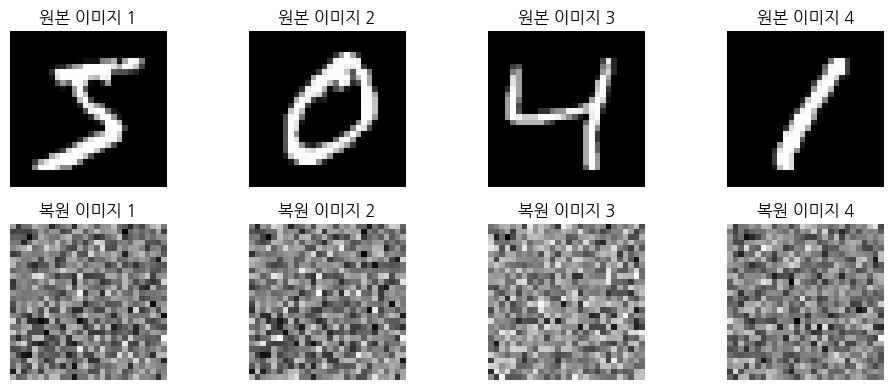

In [30]:
n = 4
x_train_recoverd = autoencoder1.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.rc('font', family='malgun gothic')
plt.tight_layout()
plt.show()

In [ ]:
x_train_2d_c = np.expand_dims(x_train_2d, -1)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

autoencoder3 = Sequential()
# 인코딩
autoencoder3.add(Conv2D(16, 3, input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))
autoencoder3.add(Conv2D(32, 3, activation='relu', padding='same'))
autoencoder3.add(MaxPooling2D(2, padding='same'))
# 디코딩
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(16, 3, activation='relu', padding='same'))
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(1, 3, activation='relu', padding='same'))

autoencoder3.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder3.summary()

In [ ]:
# %%time
history = autoencoder3.fit(x_train_2d_c, x_train_2d_c,
                           epochs=10, batch_size=256, shuffle=True, verbose=0)

In [ ]:
from keras.layers import Conv2DTranspose

autoencoder4 = Sequential()
# 인코딩
autoencoder4.add(Conv2D(16, 3, input_shape=(28, 28, 1), activation='relu', padding='same'))
autoencoder4.add(MaxPooling2D(2, padding='same'))
autoencoder4.add(Conv2D(32, 3, activation='relu', padding='same'))
autoencoder4.add(MaxPooling2D(2, padding='same'))


# 디코딩
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(16, 3, activation='relu', padding='same'))
autoencoder3.add(UpSampling2D(2))
autoencoder3.add(Conv2D(1, 3, activation='relu', padding='same'))
autoencoder4.add(Conv2DTranspose(32, 3, strides=2, padding='same'))
autoencoder4.add(Conv2D(16, 3, activation='relu', padding='same'))
autoencoder4.add(Conv2DTranspose(32, 3, strides=2, padding='same'))
autoencoder4.add(Conv2D(1, 3, activation='relu', padding='same'))

autoencoder4.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder4.summary()

In [ ]:
n = 4
x_train_recoverd = autoencoder1.predict(x_train[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i, :].reshape(28, 28))
    plt.title("원본 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

    plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_train_recoverd[i, :].reshape(28, 28))
    plt.title("복원 이미지 {}".format(i + 1))
    plt.gray(); plt.axis("off")

plt.rc('font', family='malgun gothic')
plt.tight_layout()
plt.show()